In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as scip
import scipy.linalg as la
import scipy.spatial as spat
from mpl_toolkits import axes_grid1
from scipy.optimize import minimize_scalar

In [2]:
# Деталь 𝐷 с размерами 𝐿,𝐻,𝑅 = 15, 1, 200 см и толщиной 2 см подвержена упругой деформации
# посредством приложенного к зоне 3 равномерно распределенного усилия 𝑃 (кг), действующего под
# углом -60∘. Зона 2 закреплена, зона 1 свободно движется вдоль оси 𝑋. Определить наибольшее
# смещение детали 𝑈 (см) при условии сохранения упругой деформации, если деталь изготовлена
# из стали №2.

In [3]:
E = 21e10
sig = 6e8
mu = 0.25
t = 2
angl=-60
p = 44e3

In [4]:
H = 1 #hight
L = 15 #lenght
R = 200 #radius
L1 = 8 #distance to gap
delta=0.2

In [5]:
alpha=np.linspace(np.arccos(-L/(2*(R))),np.arccos(L/(2*(R))),35)
x1=(R)*np.cos(alpha)
y1=(R)*np.sin(alpha)
x1=x1[:]
y1=y1[:]
x1,y1

(array([ -7.50000000e+00,  -7.05901255e+00,  -6.61799073e+00,
         -6.17693670e+00,  -5.73585260e+00,  -5.29474057e+00,
         -4.85360277e+00,  -4.41244134e+00,  -3.97125843e+00,
         -3.53005618e+00,  -3.08883675e+00,  -2.64760228e+00,
         -2.20635493e+00,  -1.76509683e+00,  -1.32383014e+00,
         -8.82557009e-01,  -4.41279579e-01,   1.22464680e-14,
          4.41279579e-01,   8.82557009e-01,   1.32383014e+00,
          1.76509683e+00,   2.20635493e+00,   2.64760228e+00,
          3.08883675e+00,   3.53005618e+00,   3.97125843e+00,
          4.41244134e+00,   4.85360277e+00,   5.29474057e+00,
          5.73585260e+00,   6.17693670e+00,   6.61799073e+00,
          7.05901255e+00,   7.50000000e+00]),
 array([ 199.85932553,  199.87538703,  199.89047551,  199.90459088,
         199.91773307,  199.92990202,  199.94109768,  199.95131998,
         199.96056888,  199.96884433,  199.9761463 ,  199.98247474,
         199.98782962,  199.99221093,  199.99561864,  199.99805272,


In [6]:
x1.shape,y1.shape

((35,), (35,))

In [7]:
x = (x1+np.zeros((x1.shape[0],1))).flat
y = (y1 + np.linspace(0,H,y1.shape[0])[:,np.newaxis]).flat

In [8]:
((x1+np.zeros((x1.shape[0],1))).flatten()).shape

(1225,)

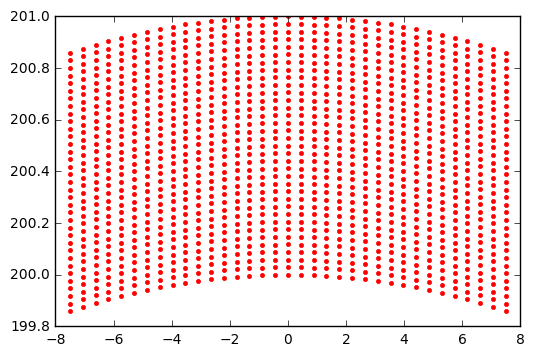

In [9]:
plt.plot(x,y,'.r')
#plt.axis('equal')

In [10]:
Nodes = np.vstack((x, y)).T
tri= spat.Delaunay(Nodes)
Elems=tri.simplices.copy()
Elems.shape

(2345, 3)

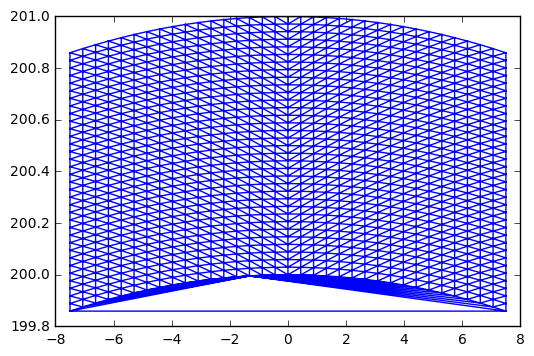

In [11]:
plt.triplot(Nodes[:,0],Nodes[:,1],Elems)
#plt.axis('equal')

In [12]:
TriangPoints = np.mean(Nodes[Elems], axis=1)
TriangPoints

array([[   2.0592689 ,  200.29321163],
       [  -4.1183194 ,  200.47709376],
       [   1.91218286,  200.98094657],
       ..., 
       [  -2.05926245,  199.988641  ],
       [  -4.1181411 ,  199.94775124],
       [   1.47086963,  199.98474656]])

In [13]:
Mask = (la.norm(TriangPoints, axis=1) > R)
TriangPoints = TriangPoints[Mask]
Elems = Elems[Mask]

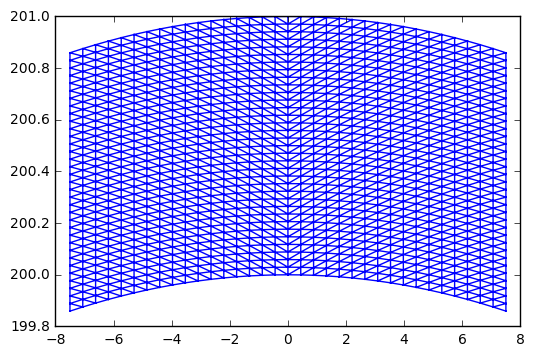

In [14]:
plt.triplot(Nodes[:,0],Nodes[:,1],Elems)
#plt.axis('equal')

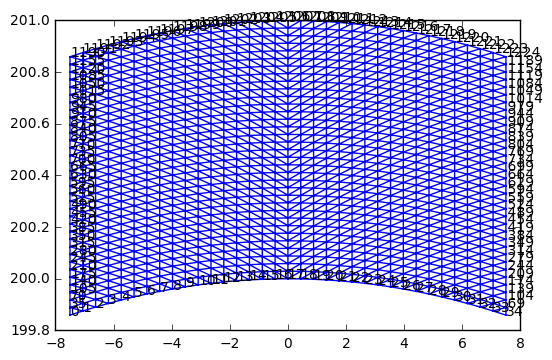

In [15]:
plt.triplot(Nodes[:,0],Nodes[:,1],Elems)
num = 0
for ni,n in enumerate(Nodes[:35]):
    plt.text(n[0],n[1], str(ni))
for ni,n in enumerate(Nodes[35:-35:35]):
    num += 35
    plt.text(n[0],n[1], str(num))
    plt.text(n[0],n[1], ' '*100 + str(num+34))
num = num+35
for ni,n in enumerate(Nodes[-35:]):
    plt.text(n[0],n[1], str(ni+num))
#plt.axis('equal')

In [16]:
Ne = Elems.shape[0]
Nn = Nodes.shape[0]
Ne, Nn

(2312, 1225)

In [17]:
ElemC = Nodes[Elems, :]
ElemC

array([[[   2.20635493,  200.31135904],
        [   1.76509683,  200.28632858],
        [   2.20635493,  200.28194727]],

       [[  -3.97125843,  200.48998064],
        [  -4.41244134,  200.48073174],
        [  -3.97125843,  200.46056888]],

       [[   1.76509683,  200.96279917],
        [   2.20635493,  200.98782962],
        [   1.76509683,  200.99221093]],

       ..., 
       [[  -0.88255701,  200.29217037],
        [  -0.88255701,  200.26275861],
        [  -0.44127958,  200.26421906]],

       [[  -0.88255701,  200.26275861],
        [  -0.44127958,  200.2348073 ],
        [  -0.44127958,  200.26421906]],

       [[  -0.88255701,  200.26275861],
        [  -0.88255701,  200.23334684],
        [  -0.44127958,  200.2348073 ]]])

In [18]:
def triarea_f(a, b, c):
    ab = b - a
    ac = c - a
    return 0.5 * np.abs((ab[:,0]*ac[:,1]-ab[:,1]*ac[:,0]))

In [21]:
ElemA = triarea_f(ElemC[:, 0, :], ElemC[:, 1, :], ElemC[:, 2, :])[..., np.newaxis]
ElemA

array([[ 0.00648909],
       [ 0.00648798],
       [ 0.00648909],
       ..., 
       [ 0.00648937],
       [ 0.00648937],
       [ 0.00648937]])

In [22]:
# вычисление Element Freedom Table для всех элементов
ElemEFT = 2*Elems[:, [0, 0, 1, 1, 2, 2]] + np.array([0, 1, 0, 1, 0, 1])
ElemEFT

array([[ 814,  815,  742,  743,  744,  745],
       [1276, 1277, 1274, 1275, 1206, 1207],
       [2352, 2353, 2424, 2425, 2422, 2423],
       ..., 
       [ 730,  731,  660,  661,  662,  663],
       [ 660,  661,  592,  593,  662,  663],
       [ 660,  661,  590,  591,  592,  593]])

In [23]:
# коэффициенты матрицы градиентов для всех элементов 
b = ElemC[:, [1, 2, 0], 1] - ElemC[:, [2, 0, 1], 1]
c = ElemC[:, [2, 0, 1], 0] - ElemC[:, [1, 2, 0], 0]

In [24]:
# проверка b и c для элемента с индексом 0
ElemC[0, :, :], b[0, :], c[0, :]

(array([[   2.20635493,  200.31135904],
        [   1.76509683,  200.28632858],
        [   2.20635493,  200.28194727]]),
 array([ 0.00438131, -0.02941176,  0.02503046]),
 array([ 0.4412581,  0.       , -0.4412581]))

In [51]:
# формирование строк матрицы градиентов B для каждого элемента
coef = 0.5 / ElemA
z = np.zeros_like(b[:,0])
B0 = np.stack((b[:,0], z, b[:,1], z, b[:,2], z), axis=1) * coef[:, [0]*6]
B1 = np.stack((z, c[:,0], z, c[:,1], z, c[:,2]), axis=1) * coef[:, [0]*6]
B2 = np.roll(B0, 1) + np.roll(B1, -1)
B0.shape, B1.shape, B2.shape, coef.shape

((2312, 6), (2312, 6), (2312, 6), (2312, 1))

In [74]:
# матрица градиентов B для каждого элемента в форме (3, 6)
ElemB = np.stack((B0, B1, B2), axis=1)
ElemB.shape

(2312, 3, 6)

In [75]:
# матрица упругих постоянных D
D = E / (1 - mu**2) * np.array([[1, mu, 0], [mu, 1, 0], [0, 0, 0.5*(1-mu)]])
D / (E / (1 - mu**2))

array([[ 1.   ,  0.25 ,  0.   ],
       [ 0.25 ,  1.   ,  0.   ],
       [ 0.   ,  0.   ,  0.375]])

In [76]:
# вычисление матриц жесткости для каждого конечного элемента
# B' * D * B * t * A
coefK = t * ElemA
ElemKe = np.matmul(np.matmul(np.transpose(ElemB, (0, 2, 1)), D), ElemB) * coefK[:, [[0]*6]*6]

In [198]:
# заполнение глобальной матрицы жесткости (пока не удалось избавиться от цикла)
K = np.zeros((Nn*2, Nn*2))
for i in range(Ne):
    EFT = ElemEFT[np.newaxis, i, :]
    K[EFT.T, EFT] += ElemKe[i, :, :]

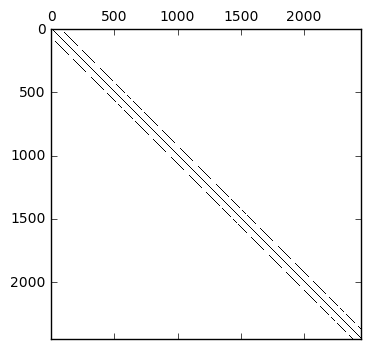

In [199]:
# вид матрицы жесткости (симметрия)
plt.spy(K)

In [200]:
# выделение вектора правой части F
F = np.zeros(Nn*2)

In [201]:
# внесение ГУ в виде перемещений
# (1) узел 0: свободна, т.е. перемещения этих узлов вдоль оси Y = 0
# (2) узел 34 закреплен, т.е. перемещения этих узлов вдоль оси Х и Y = 0

# формирвание Node Freedom Table для (1)
dof1 = np.array([1])

# формирвание Node Freedom Table для (2)
dof2 = np.array([68, 69])

# объединение таблиц (номеров степеней свободы) в одну
dof = np.hstack((dof1, dof2))
dof

array([ 1, 68, 69])

In [202]:
# непосредственно внесение ГУ в виде перемещений
K[:, dof] = 0
K[dof, :] = 0
K[dof, dof] = 1
F[dof] = 0

In [203]:
# внесение ГУ в виде узловых усилий
# (распределенное усилие уже пересчитано в узловое)
# узлы 35*34 = 1190 --- 1224 = 35*34 + 34: распределенная нагрузка по X и Y

# формирвание Node Freedom Table
dof_x = np.array(range(1190,1225))*2
dof_y = np.array(range(1190,1225))*2 + 1

# первый и последний ('крайние') узлы из диапазона получают вдвое меньшее усилие!
F[dof_x[[0,-1]]] = 0.5*p*t**2 * np.cos(np.pi*angl/180)
F[dof_y[[0,-1]]] = -0.5*p*t**2 * np.sin(np.pi*angl/180)
# остальные узлы получают полное усилие
F[dof_x[[1,-1]]] = p*t**2 * np.cos(np.pi*angl/180)
F[dof_y[[1,-1]]] = -p*t**2 * np.sin(np.pi*angl/180)

In [204]:
F[int(F.shape[0] - 200):]

array([      0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,

In [205]:
np.hstack((np.array(range(1190,1225))*2, np.array(range(1190,1225))*2 + 1))

array([2380, 2382, 2384, 2386, 2388, 2390, 2392, 2394, 2396, 2398, 2400,
       2402, 2404, 2406, 2408, 2410, 2412, 2414, 2416, 2418, 2420, 2422,
       2424, 2426, 2428, 2430, 2432, 2434, 2436, 2438, 2440, 2442, 2444,
       2446, 2448, 2381, 2383, 2385, 2387, 2389, 2391, 2393, 2395, 2397,
       2399, 2401, 2403, 2405, 2407, 2409, 2411, 2413, 2415, 2417, 2419,
       2421, 2423, 2425, 2427, 2429, 2431, 2433, 2435, 2437, 2439, 2441,
       2443, 2445, 2447, 2449])

In [206]:
np.sin(np.pi*angl/180)

-0.8660254037844386

In [207]:
F[2*1190::]

array([  44000.        ,   76210.23553303,   88000.        ,
        152420.47106606,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,

In [208]:
# решение СЛАУ
U = la.solve(K, F)
#U = np.matmul(la.inv(K), F)

np.max(U) # максимальное смещение

6.257618668697498e-05

In [209]:
U

array([  2.46166011e-05,   0.00000000e+00,   2.40354709e-05, ...,
         9.62571602e-06,   2.06200914e-05,   1.74810067e-06])

In [210]:
# новые, смещенные, узлы (с масштабным коэффициентом)
dNodes = U.reshape(Nn, 2)
NodesD = Nodes + dNodes

In [211]:
dNodes

array([[  2.46166011e-05,   0.00000000e+00],
       [  2.40354709e-05,   6.17289770e-06],
       [  2.34787615e-05,   1.11709499e-05],
       ..., 
       [  2.02109902e-05,   1.73605925e-05],
       [  2.04502448e-05,   9.62571602e-06],
       [  2.06200914e-05,   1.74810067e-06]])

In [212]:
Brd = np.vstack((np.vstack((Nodes[-35:],Nodes[69::70][::-1])),np.vstack((np.vstack((Nodes[:35][::-1],Nodes[35::35])))))) 

In [213]:
Brd.shape[0]

121

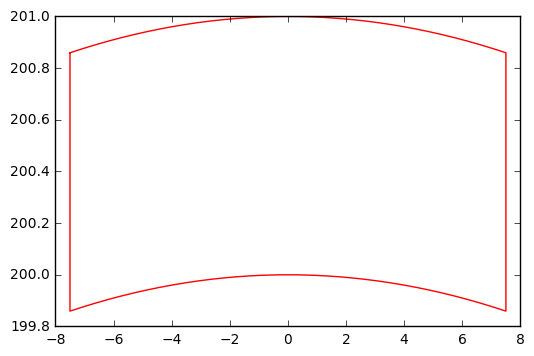

In [214]:
plt.plot(Brd[:, 0], Brd[:, 1], 'r')

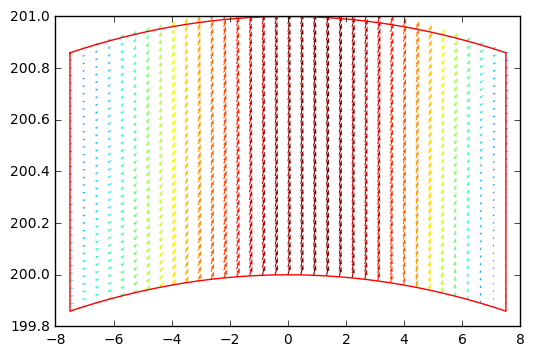

In [215]:
# отображение векторного поля перемещений узлов
fig, ax = plt.subplots()

ax.quiver(Nodes[:,0], Nodes[:,1], dNodes[:,0], dNodes[:,1], la.norm(dNodes, axis=1), headlength=5, headwidth=3)
ax.plot(Brd[:, 0], Brd[:, 1], 'r')

In [216]:
# смещения всех узлов каждого элемента
ElemU = U[ElemEFT, np.newaxis]
ElemU.shape

(2312, 6, 1)

In [217]:
ElemEps = np.matmul(ElemB, ElemU)
ElemEps.shape

(2312, 3, 1)

In [218]:
ElemSig = np.matmul(D, ElemEps)
ElemSig.shape

(2312, 3, 1)

In [219]:
ElemSig1 = 0.5*(ElemSig[:, 0]+ElemSig[:, 1]+np.sqrt((ElemSig[:, 0]-ElemSig[:, 1])**2+4*ElemSig[:, 2]**2))
np.max(ElemSig1), ElemSig1.shape

(541732.54818313592, (2312, 1))

In [220]:
ElemSig1.shape

(2312, 1)

In [221]:
NodeSig, _ = np.histogram(Elems.flat,bins=Nn,range=(0,Nn),weights=(ElemSig1 * ElemA)[:, [0]*3].flat)
NodeA, _ = np.histogram(Elems.flat,bins=Nn,range=(0,Nn),weights=(ElemA)[:, [0]*3].flat)

In [222]:
NodeSig /= NodeA
NodeSig = NodeSig.flatten()

In [223]:
np.max(NodeSig), np.min(NodeSig)

(541732.54818313592, -5283.0492521746864)

In [224]:
iminS = np.argmin(NodeSig)
imaxS = np.argmax(NodeSig)
iminS, imaxS, NodeSig[iminS], NodeSig[imaxS]

itxt = [iminS, imaxS] + list(range(0, 15)) + [23] + [37]
itxt

[458, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 23, 37]

In [225]:
def add_colorbar(ax, im, aspect=20, pad_fraction=0.5, **kwargs):
    divider = axes_grid1.make_axes_locatable(ax)
    width = axes_grid1.axes_size.AxesY(ax, aspect=1/aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return ax.figure.colorbar(im, cax=cax, **kwargs)

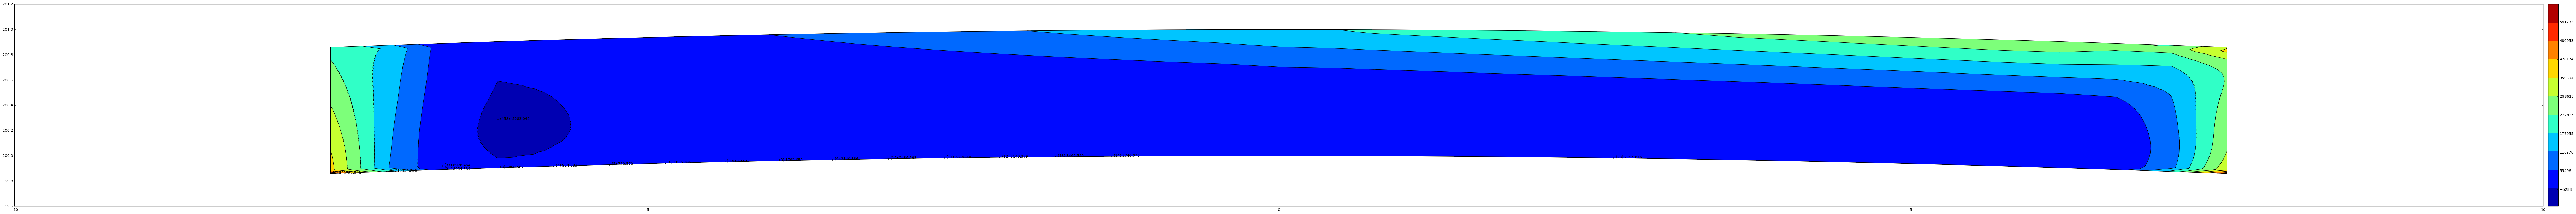

In [226]:
fig, ax = plt.subplots()
fig.set_size_inches(250, 10)

im = ax.tricontourf(NodesD[:, 0], NodesD[:, 1], Elems, NodeSig.flat, 10)
ax.tricontour(NodesD[:, 0], NodesD[:, 1], Elems, NodeSig.flat, 10, colors='k')
for i in itxt:
    ax.text(NodesD[i, 0], NodesD[i, 1], '  (%d) %.3f' % (i, NodeSig[i]), fontsize=10)

ax.scatter(NodesD[itxt, 0], NodesD[itxt, 1], s=5)
ax.plot(np.hstack((Brd[:, 0], Brd[0, 0])), np.hstack((Brd[:, 1], Brd[0, 1])), '-k')

ax.set_aspect('equal')


cax = add_colorbar(ax, im)
cax.set_ticks(np.linspace(NodeSig.min(), NodeSig.max(), 10))

In [227]:
def findNodesD(P):
    F = np.zeros(Nn*2)

    dof_x = np.array(range(1190,1225))*2
    dof_y = np.array(range(1190,1225))*2 + 1

    # первый и последний ('крайние') узлы из диапазона получают вдвое меньшее усилие!
    F[dof_x[[0,-1]]] = 0.5*P*t**2 * np.cos(np.pi*angl/180)
    F[dof_y[[0,-1]]] = -0.5*P*t**2 * np.sin(np.pi*angl/180)
    # остальные узлы получают полное усилие
    F[dof_x[[1,-1]]] = P*t**2 * np.cos(np.pi*angl/180)
    F[dof_y[[1,-1]]] = -P*t**2 * np.sin(np.pi*angl/180)
    U = la.solve(K, F)
    dNodes = U.reshape(Nn, 2)
    NodesD = Nodes + dNodes
    return NodesD, U #np.linalg.inv(K).dot(F).reshape(Nodes.shape[0], 2)

(-8.0, 8.0, 199.80000000000001, 201.20000000000002)

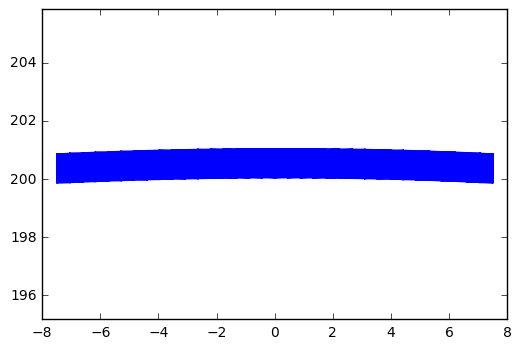

In [228]:
NodesD,_ = findNodesD(30000000)

plt.triplot(NodesD[:, 0], NodesD[:, 1], Elems)
plt.axis('equal')

In [229]:
def Max_Stress (P):
    NodesD,U = findNodesD(P)
    newElemsCoords = NodesD[Elems]
    newA = np.zeros(newElemsCoords.shape[0])
    newA = triarea_f(newElemsCoords[:, 0, :], newElemsCoords[:, 1, :], newElemsCoords[:, 2, :])[..., np.newaxis]
    ElemEFT = 2*Elems[:, [0, 0, 1, 1, 2, 2]] + np.array([0, 1, 0, 1, 0, 1])
    b = newElemsCoords[:, [1, 2, 0], 1] - newElemsCoords[:, [2, 0, 1], 1]
    c = newElemsCoords[:, [2, 0, 1], 0] - newElemsCoords[:, [1, 2, 0], 0]
    coef = 0.5 / newA
    z = np.zeros_like(b[:,0])
    B0 = np.stack((b[:,0], z, b[:,1], z, b[:,2], z), axis=1) * coef[:, [0]*6]
    B1 = np.stack((z, c[:,0], z, c[:,1], z, c[:,2]), axis=1) * coef[:, [0]*6]
    B2 = np.roll(B0, 1) + np.roll(B1, -1)
    ElemB = np.stack((B0, B1, B2), axis=1)

    ElemU = U[ElemEFT, np.newaxis]
    
    ElemEps = np.matmul(ElemB, ElemU)
    ElemSig = np.matmul(D, ElemEps)
    ElemSig1 = 0.5*(ElemSig[:, 0]+ElemSig[:, 1]+np.sqrt((ElemSig[:, 0]-ElemSig[:, 1])**2+4*ElemSig[:, 2]**2))
    NodeSig, _ = np.histogram(Elems.flat,bins=Nn,range=(0,Nn),weights=(ElemSig1 * newA)[:, [0]*3].flat)
    NodeA, _ = np.histogram(Elems.flat,bins=Nn,range=(0,Nn),weights=(newA)[:, [0]*3].flat)
    NodeSig /= NodeA
    NodeSig = NodeSig.flatten()
    return np.max(np.abs(NodeSig))

In [230]:
def AbsP(P):
    return abs(sig - Max_Stress(P))

In [231]:
res = minimize_scalar(AbsP, bounds=[0,10e7], method="Bounded")

In [232]:
res.x, sig

(38807935.787439801, 600000000.0)

In [233]:
NodesD,_ = findNodesD(res.x)

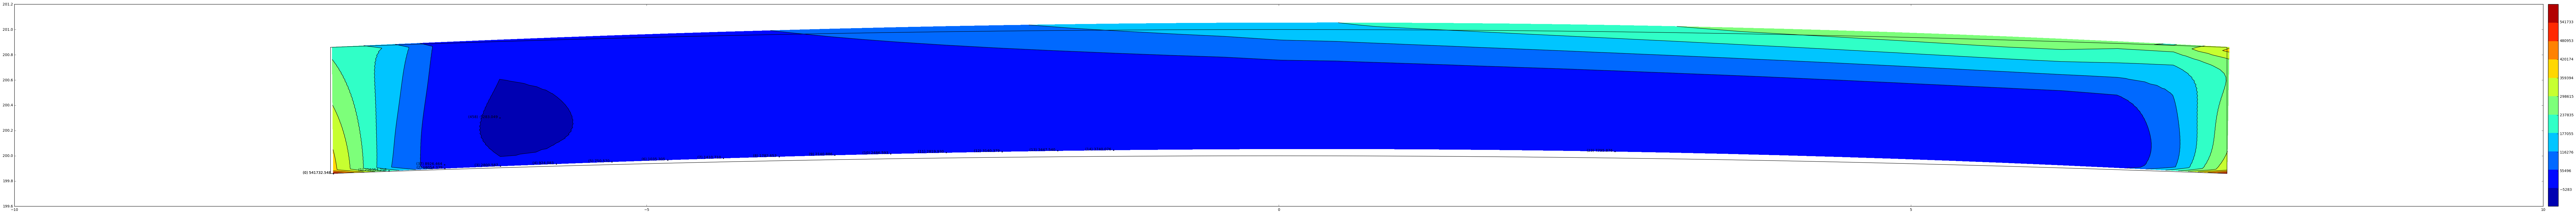

In [234]:
fig, ax = plt.subplots()
fig.set_size_inches(250, 10)

im = ax.tricontourf(NodesD[:, 0], NodesD[:, 1], Elems, NodeSig.flat, 10)
ax.tricontour(NodesD[:, 0], NodesD[:, 1], Elems, NodeSig.flat, 10, colors='k')
for i in itxt:
    if NodesD[i, 0] > L*0.5:
        align='left'
    else:
        align='right'
        
    ax.text(NodesD[i, 0], NodesD[i, 1], '  (%d) %.3f  ' % (i, NodeSig.flat[i]), fontsize=10, horizontalalignment=align)
    
ax.scatter(NodesD[itxt, 0], NodesD[itxt, 1], s=5)
ax.plot(np.hstack((Brd[:, 0], Brd[0, 0])), np.hstack((Brd[:, 1], Brd[0, 1])), '-k')
ax.set_aspect('equal')

cax = add_colorbar(ax, im)
cax.set_ticks(np.linspace(NodeSig.min(), NodeSig.max(), 10))